# Bank Data Analysis

# Objective

In this case study, you will be working on Banking Data Analysis using Apache Spark, a powerful distributed computing framework designed for big data processing. This assignment aims to give you hands-on experience in analyzing large-scale banking datasets using PySpark and AWS services. You will apply techniques learned in data analytics to clean, transform, and explore banking data, drawing meaningful insights to support financial decision-making. Apart from understanding how big data tools can optimize performance on a single machine and across clusters, you will develop a structured approach to analyzing market capitalization trends, currency conversions, and global banking performance. Additionally, you will use AWS S3 to store the processed data once the ETL pipeline is complete, ensuring efficient data management and retrieval.


# Business Value

The banking industry operates in a highly competitive and globalized market where financial institutions must continuously monitor their market position, performance, and currency fluctuations. To stay competitive, banks must leverage data-driven insights to optimize their financial strategies, assess market trends, and make informed decisions. In this assignment, you will analyze banking data to uncover patterns in market capitalization, currency conversions, and global rankings. With Apache Spark's ability to handle large datasets efficiently, financial institutions can process vast amounts of data in real-time, helping them make faster and more informed decisions.


As an analyst at a financial institution, your task is to examine historical banking data to derive actionable insights that can drive strategic growth. Your analysis will help identify the top 10 largest banks by market capitalization, convert market cap values into multiple currencies (USD, GBP, EUR, INR), and store the processed data for easy retrieval. To enhance scalability and accessibility, you will utilize AWS S3 for data storage, ensuring seamless integration with cloud-based analytics tools. By leveraging big data analytics and cloud services, financial institutions can streamline operations, enhance decision-making, and maximize revenue opportunities.


# Dataset

The data for this project can be accessed from the following [wikipedia link](https://web.archive.org/web/20230908091635/https://en.wikipedia.org/wiki/List_of_largest_banks).

The dataset used in this analysis comprises global banking data extracted from a Wikipedia page (List of Largest Banks) archived as of September 2023.

It includes rankings of the world's largest banks based on market capitalization (in USD billions) and is structured into a single table with three columns. The data was scraped programmatically, cleaned, and transformed using PySpark to support cross-currency analysis. Exchange rate data (for USD, GBP, EUR, and INR) was sourced from a CSV file to enable currency conversions. The processed dataset is stored in CSV and SQLite formats for accessibility and efficient querying.

The dataset consists of a single table (Largest_banks) with the following three key attributes:
- **Rank:** Numerical position of the bank based on market capitalization.
- **Bank Name:** Name of the financial institution.
- **Market Cap (USD Billion):** Market valuation of the bank in USD billions.
This dataset enables analysis of global banking trends, cross-currency valuations, and the relative market dominance of financial institutions.

An additional data on market exchange rates is available to compare the marketcap dealing with different currencies.


<h2>Assignment Tasks</h2>

<ol>
    <li>
        <strong>Data Preparation</strong>
        <p>The dataset consists of a structured table containing global banking data. Before performing any analysis, it is crucial to prepare the data to ensure consistency and efficiency in processing.</p>
        Check for data consistency and ensure all columns are correctly formatted.<br>
        Structure and prepare the data for further processing and analysis.<br>
</br>
    <li>
        <strong>Data Cleaning</strong>
        <ul>
            2.1. <strong>Handling Missing Values:</strong> Decide on an approach to handle missing data (e.g., imputation or removal). Mention the approach in your report.<br>
            2.2. <strong>Fixing Columns:</strong> Ensure all columns are properly named and formatted.<br>
            2.3. <strong>Handling Outliers:</strong> Identify outliers in the dataset and explain why they are considered outliers. It is not necessary to remove them for this task, but mention your approach for handling them.<br>
        </ul>
</br>
    <li>
        <strong>Exploratory Data Analysis:</strong></br>
            EDA Finding Patterns - Analyze the dataset and find patterns based on the following points:
                <ul>
                    3.1. Convert PySpark DataFrame to Pandas DataFrame for visualization.<br>
                    3.2. Analyze the distribution of market capitalization using a histogram.<br>
                    3.3. Identify the top 10 banks by market capitalization using a bar chart.<br>
                    3.4. Visualize the relationship between market capitalization and bank ranking using a scatter plot.<br>
                    3.5. Use a boxplot to examine the spread and outliers in market capitalization.<br>
                    3.6. Display the quartile distribution of market capitalization using a violin plot.<br>
                    3.7. Compute cumulative market share and visualize it with a line plot.<br>
                    3.8. Categorize banks into market capitalization ranges and analyze their distribution using a bar chart.<br>
                    3.9. Calculate and display market share distribution of top 10 banks using a pie chart.<br>
                </ul>
        </ul>
</br>
    <li>
        <strong>Banking Data ETL Querying</strong>
        <ul>
            4.1. Perform Advanced Market Capitalization Analysis with Growth Metrics.<br>
            4.2. Analyze Market Concentration and Categorize Banks Based on Market Share Tiers.<br>
            4.3. Examine Statistical Distribution of Market Capitalization Using Quartile Analysis.<br>
            4.4. Conduct Comparative Size Analysis to Classify Banks by Relative Market Size.<br>
            4.5. Evaluate Market Growth and Identify Gaps Between Consecutive Banks.<br>
            4.6. Assess Market Dominance by Measuring Cumulative Share and Dominance Score.<br>
            4.7. Analyze Segment-Wise Bank Performance Based on Market Capitalization Ranges.<br>
            4.8. Generate a Comprehensive Performance Dashboard for Bank Rankings and Metrics.<br>
        </ul>
    </br>
    <li>
        <strong>Conclusion</strong></br>
            Provide final insights and recommendations based on the analysis:</br>
            <ul>
            5.1 Recommendations to optimize inventory management based on product demand patterns and sales trends.</br>
            5.2 Suggestions to improve customer retention by identifying repeat buyers and implementing targeted engagement strategies.</br>
            5.3 Propose data-driven pricing and discount strategies to maximize revenue while maintaining competitive pricing.</br>
            5.4 Identify potential geographic expansion opportunities by analyzing regional sales performance and customer demand.</br>
            5.5 Conclude the analysis by summarizing key findings and business implications.<br>
            5.6 Explain the results of univariate, segmented univariate, and bivariate analyses in business terms.<br>
            5.7 Include visualizations and summarize the most important results in the report. Insights should explain why each variable is important and how they can influence traffic safety policies and urban planning.<br>
            </ul>
    </br>
    <li>
        <strong>Visualization Integration [Optional]</strong>
        <p>Enhance the project by incorporating a visualization component that connects the processed data stored in an S3 bucket to a business intelligence tool such as Tableau or Power BI. This involves setting up the connection between the S3 bucket and the chosen visualization tool, importing the processed dataset for analysis and visualization, creating interactive dashboards to explore key trends and insights and ensuring data updates are reflected dynamically in the visualization tool.<br>
        </ul>
</ol>

Import Required Libraries

In [1]:
# # Install the required libraries
# !pip install --quiet pyspark==3.5.4 pandas==2.2.2
!pip install seaborn
!pip install lxml
!pip install html5lib


[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import required libraries
import logging
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
# Import PySpark libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, round, count, when, isnull

In [3]:
# Initialize Spark session
spark = SparkSession.builder \
    .appName("BankingDataAnalysis") \
    .getOrCreate()

AWS Configuration

In [ ]:
# # Import AWS-related libraries
# import boto3
# from pyspark.sql import SparkSession
# import os

# # AWS Configuration
# os.environ['AWS_ACCESS_KEY_ID'] = 'YOUR_ACCESS_KEY'
# os.environ['AWS_SECRET_ACCESS_KEY'] = 'YOUR_SECRET_KEY'
# os.environ['AWS_DEFAULT_REGION'] = 'your-region'  # e.g., 'us-east-1'

# # Initialize Spark session with S3 configuration
# spark = SparkSession.builder \
#     .appName("BankingDataAnalysis") \
#     .config("spark.hadoop.fs.s3a.access.key", os.environ['AWS_ACCESS_KEY_ID']) \
#     .config("spark.hadoop.fs.s3a.secret.key", os.environ['AWS_SECRET_ACCESS_KEY']) \
#     .config("spark.hadoop.fs.s3a.impl", "org.apache.hadoop.fs.s3a.S3AFileSystem") \
#     .getOrCreate()

#**1. Data Preparation** <font color = red>[5 marks]</font> <br>


The data for this project can be accessed from the wikipedia link provided above. The page features data regarding global banking data.

Utilise the pandas method to read tables from the html document
and extract the requried data consists of a structured format.

Before performing any analysis, it is crucial to prepare the data to ensure consistency, and efficiency in processing.

In [4]:
# Initialize Spark session

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)
# URL of the Wikipedia page
url = "https://web.archive.org/web/20230908091635/https://en.wikipedia.org/wiki/List_of_largest_banks"

# Use pandas to read all HTML tables from the page
tables = pd.read_html(url)

# Number of tables
print(f"Number of tables: {len(tables)}")
# Load the correct table (Table 1)
#print(tables[1].head(200)) 
banks_pd = tables[1]

# Convert pandas DataFrame to PySpark DataFrame
banks_spark_df = spark.createDataFrame(banks_pd)
# Show the Spark DataFrame
banks_spark_df.show()
banks_spark_df.printSchema()

# Rename columns
banks_spark_df = banks_spark_df.withColumnRenamed(banks_spark_df.columns[0], "Rank") \
                               .withColumnRenamed(banks_spark_df.columns[1], "Bank_Name") \
                               .withColumnRenamed(banks_spark_df.columns[2], "MarketCap_USD_Billion")

# Show the first few rows of the PySpark DataFrame
banks_spark_df.show(5)

# Print the schema of the DataFrame
banks_spark_df.printSchema()

# Configure logging
logger.info("Data loading and preparation complete.")


Number of tables: 4
+----+--------------------+------------------------+
|Rank|           Bank name|Market cap (US$ billion)|
+----+--------------------+------------------------+
|   1|      JPMorgan Chase|                  432.92|
|   2|     Bank of America|                  231.52|
|   3|Industrial and Co...|                  194.56|
|   4|Agricultural Bank...|                  160.68|
|   5|           HDFC Bank|                  157.91|
|   6|         Wells Fargo|                  155.87|
|   7|   HSBC Holdings PLC|                   148.9|
|   8|      Morgan Stanley|                  140.83|
|   9|China Constructio...|                  139.82|
|  10|       Bank of China|                  136.81|
+----+--------------------+------------------------+

root
 |-- Rank: long (nullable = true)
 |-- Bank name: string (nullable = true)
 |-- Market cap (US$ billion): double (nullable = true)



INFO:__main__:Data loading and preparation complete.


+----+--------------------+---------------------+
|Rank|           Bank_Name|MarketCap_USD_Billion|
+----+--------------------+---------------------+
|   1|      JPMorgan Chase|               432.92|
|   2|     Bank of America|               231.52|
|   3|Industrial and Co...|               194.56|
|   4|Agricultural Bank...|               160.68|
|   5|           HDFC Bank|               157.91|
+----+--------------------+---------------------+
only showing top 5 rows
root
 |-- Rank: long (nullable = true)
 |-- Bank_Name: string (nullable = true)
 |-- MarketCap_USD_Billion: double (nullable = true)



Load the data for exchange rates

In [5]:
# Load the exchange rate data CSV file
exchange_rates_df = spark.read.option("header", True) \
                              .csv("exchange_rates1.csv")

# Convert Rate column to float type for calculations
from pyspark.sql.functions import col
exchange_rates_df = exchange_rates_df.withColumn("Rate", col("Rate").cast("float"))

# Show the first few rows to verify
exchange_rates_df.show(5)


+--------+-----+
|Currency| Rate|
+--------+-----+
|     EUR| 0.93|
|     GBP|  0.8|
|     INR|82.95|
+--------+-----+



#**2. Data Cleaning** <font color = red>[20 marks]</font> <br>

##**2.1 Handle Missing Values** <font color = red>[10 marks]</font> <br>


In [7]:
# Import required PySpark functions
from pyspark.sql.functions import col, when, isnan, count

# Step 1: Print the current schema to check data types
print("Schema before cleaning:")
banks_spark_df.printSchema()



Schema before cleaning:
root
 |-- Rank: long (nullable = true)
 |-- Bank_Name: string (nullable = true)
 |-- MarketCap_USD_Billion: double (nullable = true)



In [8]:
# Check for missing values
from pyspark.sql.functions import col, when, count, isnan

# Check for missing values: nulls, NaNs, and empty strings
#missing_values_df = banks_spark_df.select([
 #   count(when(col(c).isNull() | isnan(col(c)) | (col(c) == ''), c)).alias(c)
 #   for c in banks_spark_df.columns
#])

#SELECT CAST(NULLIF(column_name, '') AS BIGINT) AS column_as_int FROM table_name;
#print("🔍 Missing values per column:")
#missing_values_df.show()
banks_spark_df.select([count(when(isnull(c), c)).alias(c) for c in banks_spark_df.columns]).show()


+----+---------+---------------------+
|Rank|Bank_Name|MarketCap_USD_Billion|
+----+---------+---------------------+
|   0|        0|                    0|
+----+---------+---------------------+



In [10]:
# Drop rows with missing values
banks_spark_df = banks_spark_df.na.drop()
banks_spark_df.printSchema()

root
 |-- Rank: long (nullable = true)
 |-- Bank_Name: string (nullable = true)
 |-- MarketCap_USD_Billion: double (nullable = true)



##**2.2 Fixing Columns** <font color = red>[5 marks]</font> <br>


The Market cap is already in numeric so no conversion needed.

In [11]:
# Count the total number of rows
total_rows = banks_spark_df.count()
print(f"Total number of rows: {total_rows}")

# Count the number of distinct rows
distinct_rows = banks_spark_df.distinct().count()

# Check if there are duplicates
if total_rows != distinct_rows:
    print(f"Warning: {total_rows - distinct_rows} duplicate rows found.")
else:
    print("No duplicate rows found.")


Total number of rows: 10
No duplicate rows found.


##**2.3 Handle Outliers** <font color = red>[5 marks]</font> <br>


In [12]:
# Write code for outlier analysis
from pyspark.sql.functions import expr

# Calculate Q1 and Q3
quantiles = banks_spark_df.approxQuantile("MarketCap_USD_Billion", [0.25, 0.75], 0.01)
Q1, Q3 = quantiles[0], quantiles[1]
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# Flag rows as outliers if MarketCap is outside the bounds
outliers_df = banks_spark_df.withColumn(
    "is_outlier",
    ( (col("MarketCap_USD_Billion") < lower_bound) | (col("MarketCap_USD_Billion") > upper_bound) )
)

# Show number of outliers detected
num_outliers = outliers_df.filter("is_outlier = true").count()
print(f"Number of outliers detected: {num_outliers}")

# Display the outliers
outliers_df.filter("is_outlier = true").select("Bank_Name", "MarketCap_USD_Billion").show(truncate=False)


Q1: 140.83, Q3: 194.56, IQR: 53.72999999999999
Lower Bound: 60.23500000000003, Upper Bound: 275.155
Number of outliers detected: 1
+--------------+---------------------+
|Bank_Name     |MarketCap_USD_Billion|
+--------------+---------------------+
|JPMorgan Chase|432.92               |
+--------------+---------------------+



Saving the Cleaned Dataset into a CSV File into the S3 Bucket


#**3. Exploratory Data Analysis** <font color = red>[40 marks]</font> <br>


##**3.1. Conversion from PySpark to Pandas DataFrame** <font color = red>[5 marks]</font> <br>

Convert PySpark DataFrame to Pandas DataFrame for visualization

In [14]:
# Convert PySpark DataFrame to Pandas DataFrame
banking_pd_df = banks_spark_df.toPandas()

# Display first few rows to verify
banking_pd_df.head()

,Rank,Bank_Name,MarketCap_USD_Billion
0,1,JPMorgan Chase,432.92
1,2,Bank of America,231.52
2,3,Industrial and Commercial Bank of China,194.56
3,4,Agricultural Bank of China,160.68
4,5,HDFC Bank,157.91


##**3.2. Market Capitalization** <font color = red>[5 marks]</font> <br>

Analyze the distribution of market capitalization using a histogram

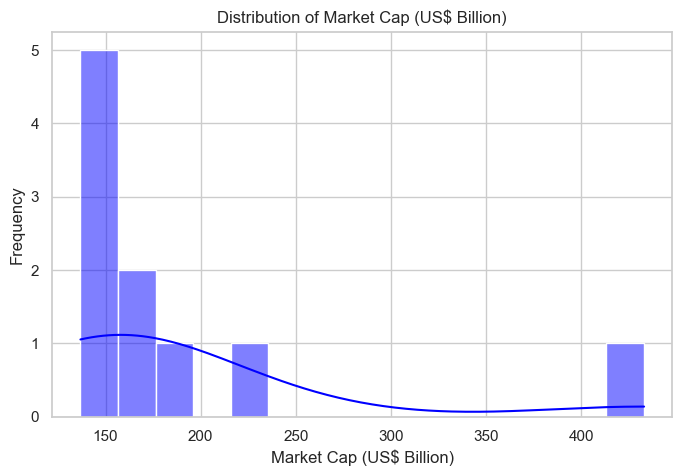

In [16]:
# Distribution of Market Cap (US$ Billion)

# Set the style for seaborn
sns.set(style="whitegrid")

# Plot the distribution of market cap
plt.figure(figsize=(8, 5))
sns.histplot(banking_pd_df["MarketCap_USD_Billion"], bins=15, kde=True, color="blue")
plt.title("Distribution of Market Cap (US$ Billion)")
plt.xlabel("Market Cap (US$ Billion)")
plt.ylabel("Frequency")
plt.show()



##**3.3. Top 10 Banks** <font color = red>[5 Marks]</font> <br>

Identify the top 10 banks by market capitalization using a bar chart

C:\Users\evenkol\AppData\Local\Temp\ipykernel_34544\4201023844.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="MarketCap_USD_Billion", y="Bank_Name", data=top_10_banks, palette="viridis")


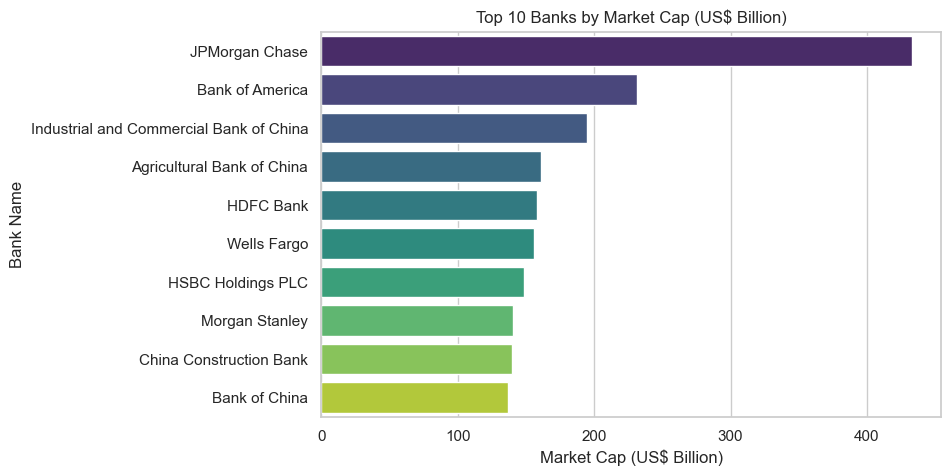

In [18]:
#2: Top 10 Banks by Market Cap

# Sort the DataFrame by market cap in descending order
top_10_banks = banking_pd_df.sort_values(by="MarketCap_USD_Billion", ascending=False).head(10)

# Plot the top 10 banks by market cap
plt.figure(figsize=(8, 5))
sns.barplot(x="MarketCap_USD_Billion", y="Bank_Name", data=top_10_banks, palette="viridis")
plt.title("Top 10 Banks by Market Cap (US$ Billion)")
plt.xlabel("Market Cap (US$ Billion)")
plt.ylabel("Bank Name")
plt.show()



##**3.4. Market Cap vs Bank Ranking** <font color = red>[5 Marks]</font> <br>

Visualize the relationship between market capitalization and bank ranking using a scatter plot

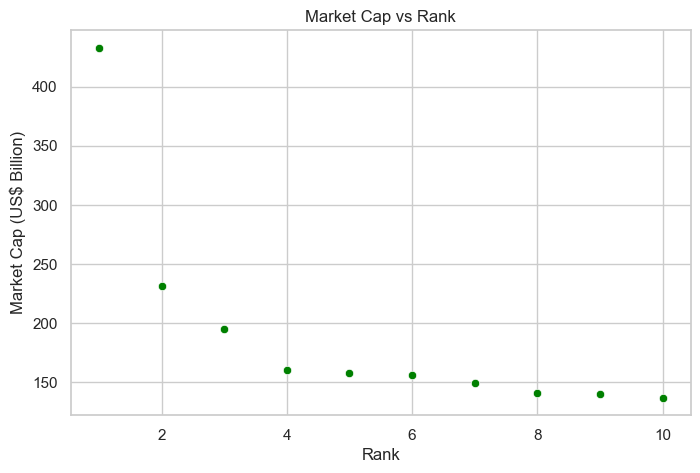

In [21]:
# Market Cap vs Rank

# Plot market cap vs rank
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Rank", y="MarketCap_USD_Billion", data=banking_pd_df, color="green")
plt.title("Market Cap vs Rank")
plt.xlabel("Rank")
plt.ylabel("Market Cap (US$ Billion)")
plt.show()



##**3.5. Market Cap Analysis** <font color = red>[5 Marks]</font> <br>

Use a boxplot to examine the spread and outliers in market capitalization.

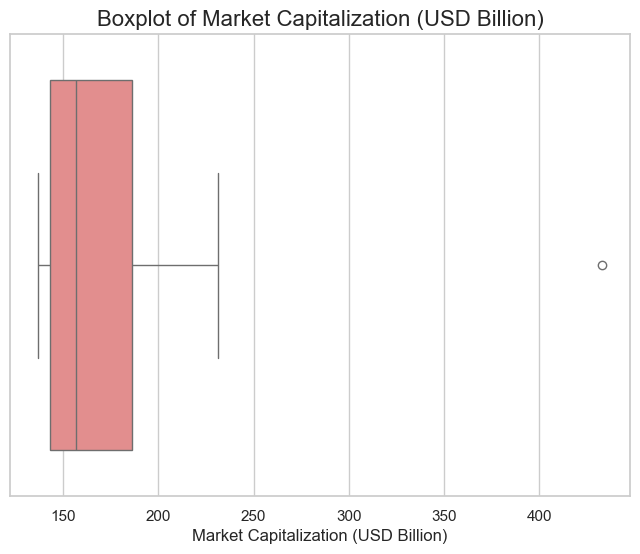

In [22]:
# Boxplot of Market Cap
# To show the spread and outliers in the market capitalization data.

plt.figure(figsize=(8,6))
sns.boxplot(x=banking_pd_df['MarketCap_USD_Billion'], color='lightcoral')

plt.title('Boxplot of Market Capitalization (USD Billion)', fontsize=16)
plt.xlabel('Market Capitalization (USD Billion)')

plt.show()



##**3.6. Market Cap Quartile Distribution** <font color = red>[5 Marks]</font> <br>

Display the quartile distribution of market capitalization using a violin plot.

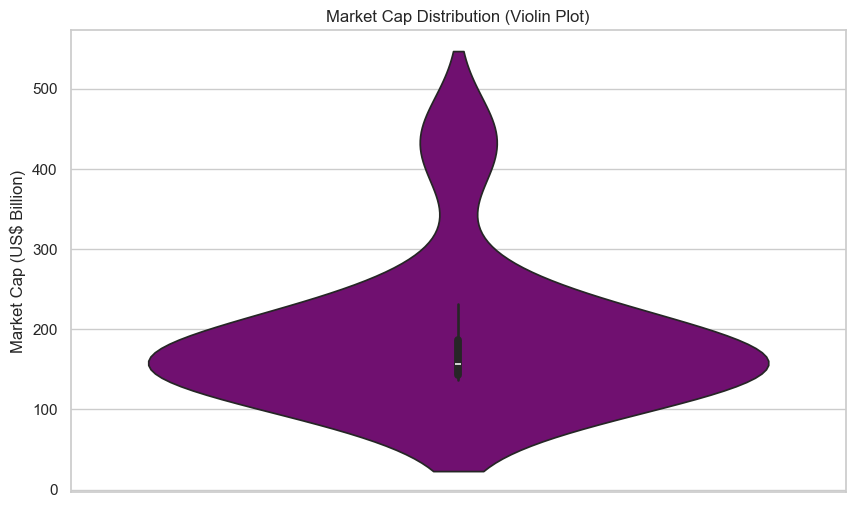

In [23]:
plt.figure(figsize=(10, 6))
sns.violinplot(y=banking_pd_df["MarketCap_USD_Billion"], color="purple")
plt.title("Market Cap Distribution (Violin Plot)")
plt.ylabel("Market Cap (US$ Billion)")
plt.show()

##**3.7. Cumulative Market Share Analysis** <font color = red>[5 Marks]</font> <br>

Compute cumulative market share and visualize it with a line plot.

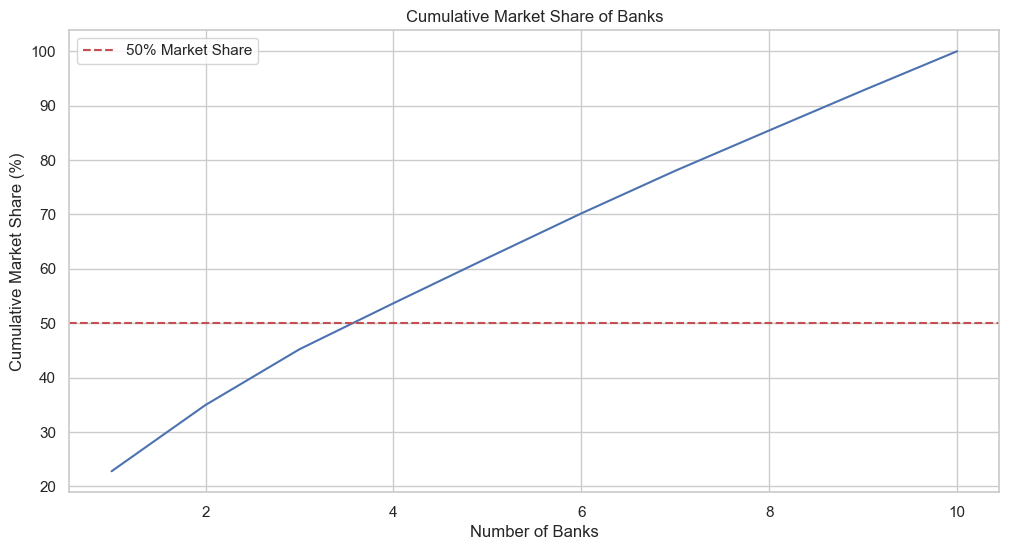

In [24]:
# Cumulative Market Share

# Calculate cumulative market share
banking_pd_df_sorted = banking_pd_df.sort_values('MarketCap_USD_Billion', ascending=False)
banking_pd_df_sorted['cumulative_share'] = banking_pd_df_sorted['MarketCap_USD_Billion'].cumsum() / banking_pd_df_sorted['MarketCap_USD_Billion'].sum() * 100

plt.figure(figsize=(12, 6))
plt.plot(range(1, len(banking_pd_df_sorted) + 1), banking_pd_df_sorted['cumulative_share'], 'b-')
plt.axhline(y=50, color='r', linestyle='--', label='50% Market Share')
plt.title('Cumulative Market Share of Banks')
plt.xlabel('Number of Banks')
plt.ylabel('Cumulative Market Share (%)')
plt.legend()
plt.grid(True)
plt.show()


##**3.8. Categorising Banks** <font color = red>[5 Marks]</font> <br>

Categorize banks into market capitalization ranges and analyze their distribution using a bar chart.

C:\Users\evenkol\AppData\Local\Temp\ipykernel_34544\2433089517.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=market_cap_counts.index, y=market_cap_counts.values, palette='viridis')


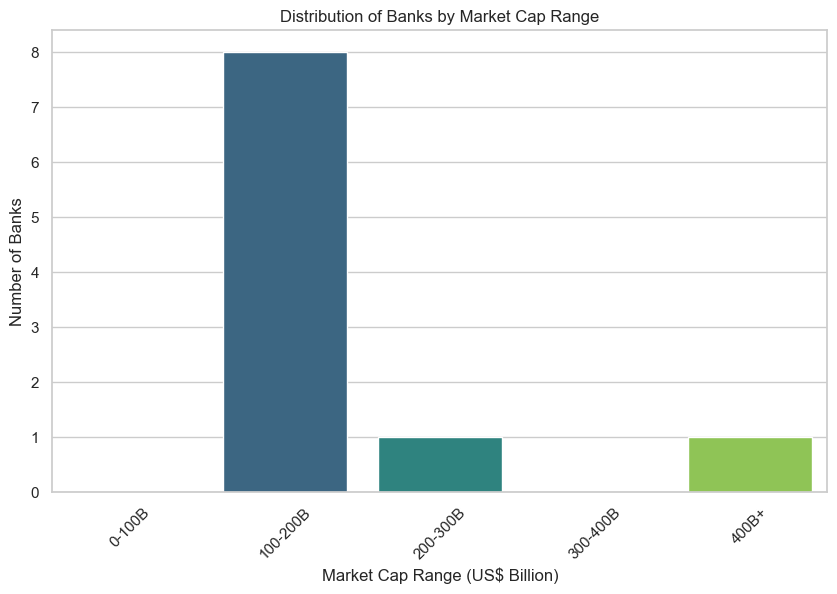

In [25]:
# Market Cap Range Distribution

# Create market cap ranges
bins = [0, 100, 200, 300, 400, float('inf')]
labels = ['0-100B', '100-200B', '200-300B', '300-400B', '400B+']
banking_pd_df['market_cap_range'] = pd.cut(banking_pd_df['MarketCap_USD_Billion'], bins=bins, labels=labels)

plt.figure(figsize=(10, 6))
market_cap_counts = banking_pd_df['market_cap_range'].value_counts().sort_index()
sns.barplot(x=market_cap_counts.index, y=market_cap_counts.values, palette='viridis')
plt.title('Distribution of Banks by Market Cap Range')
plt.xlabel('Market Cap Range (US$ Billion)')
plt.ylabel('Number of Banks')
plt.xticks(rotation=45)
plt.show()


##**3.9. Visualise Market Share Distribution** <font color = red>[5 Marks]</font> <br>


Calculate and display market share distribution among the top 10 banks using a pie chart.

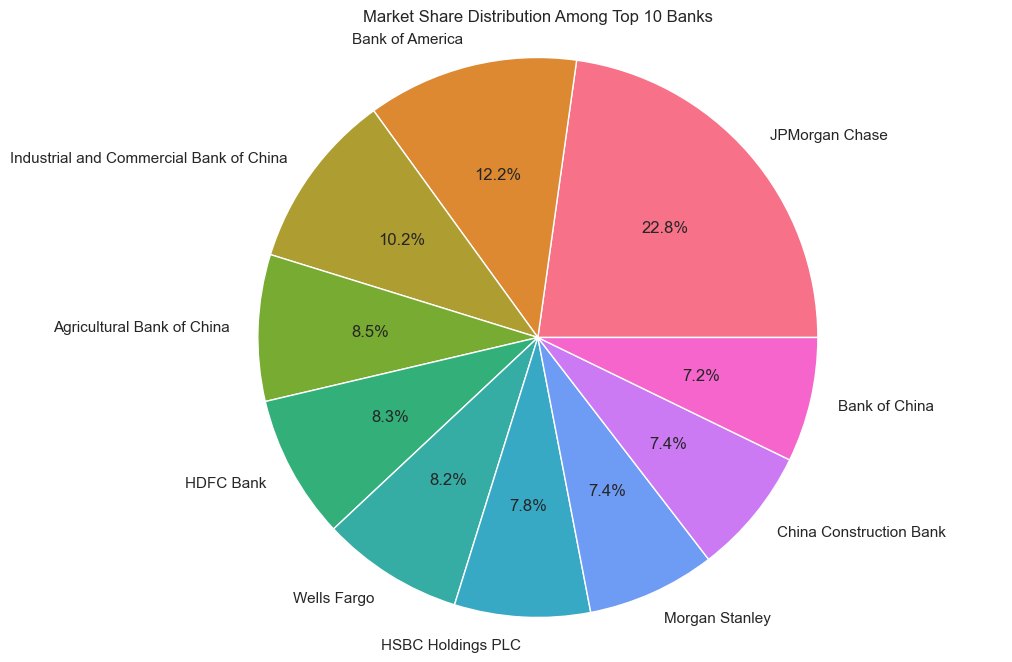

In [27]:
# Top 10 Banks Market Share

# Calculate market share percentage for top 10 banks
total_market_cap = banking_pd_df['MarketCap_USD_Billion'].sum()
top_10_banks = banking_pd_df.nlargest(10, 'MarketCap_USD_Billion')
top_10_banks['market_share'] = (top_10_banks['MarketCap_USD_Billion'] / total_market_cap) * 100

plt.figure(figsize=(12, 8))
colors = sns.color_palette('husl', n_colors=10)
plt.pie(top_10_banks['market_share'],
        labels=top_10_banks['Bank_Name'],
        autopct='%1.1f%%',
        colors=colors)
plt.title('Market Share Distribution Among Top 10 Banks')
plt.axis('equal')
plt.show()

#**4. ETL and Querying** <font color = red>[45 marks]</font> <br>

In [28]:
#Imports & Spark Session Initialization

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, lit, round
import logging
from datetime import datetime
import sqlite3
import pandas as pd

# Initialize Spark Session
spark = SparkSession.builder \
    .appName("BankingDataAnalysis") \
    .getOrCreate()

# Logging Configuration
logfile = "code_log.txt"

In [29]:
#Logging Function

def log_progress(msg):
    timeformat = '%Y-%h-%d-%H:%M:%S'
    timestamp = datetime.now().strftime(timeformat)
    with open(logfile, 'a') as f:
        f.write(f"{timestamp} : {msg}\n")

Q: Extract banking data from Wikipedia and process it using PySpark.

In [30]:
#Extract Data

def extract(url, table_attribs):
    log_progress("Extracting data from URL...")

    # Use pandas to scrape the HTML table (PySpark cannot directly read HTML)
    tables = pd.read_html(url)
    banking_pd_df = tables[1]  # Assuming Table 1 is correct
    banking_pd_df = banking_pd_df[['Bank name', 'Market cap (US$ billion)']]
    banking_pd_df.columns = table_attribs

    # Convert to PySpark DataFrame
    banking_df = spark.createDataFrame(banking_pd_df)
    return banking_df

Q: Transform banking data by converting market capitalization values into multiple currencies

In [31]:
#Transform Data

def transform(banking_df, exchange_rate_path):
    log_progress("Transforming data...")

    # Load exchange rates
    exchange_rate_df = spark.read.csv(exchange_rate_path, header=True, inferSchema=True)

    # Convert exchange rates to a dictionary (for easy multiplication)
    exchange_rates = exchange_rate_df.rdd.collectAsMap()

    # Calculate new columns using PySpark operations
    banking_df = banking_df.withColumn(
        "MC_GBP_Billion",
        round(col("MC_USD_Billion") * lit(exchange_rates['GBP']), 2)
    ).withColumn(
        "MC_INR_Billion",
        round(col("MC_USD_Billion") * lit(exchange_rates['INR']), 2)
    ).withColumn(
        "MC_EUR_Billion",
        round(col("MC_USD_Billion") * lit(exchange_rates['EUR']), 2)
    )

    return banking_df

##**4.1. Market Capitalization Analysis** <font color = red>[3 marks]</font> <br>

Q: Perform Advanced Market Capitalization Analysis with Growth Metrics

In [32]:
# Query: Advanced Market Cap Analysis with Growth Metrics
from pyspark.sql.functions import lag, round, col
from pyspark.sql.window import Window

# Define window ordered by Rank ascending
window_spec = Window.orderBy("Rank")

# Add previous market cap column (lag)
banks_spark_df = banks_spark_df.withColumn(
    "Prev_MarketCap",
    lag("MarketCap_USD_Billion").over(window_spec)
)

# Calculate the market cap difference (growth proxy)
banks_spark_df = banks_spark_df.withColumn(
    "MarketCap_Growth",
    round(col("MarketCap_USD_Billion") - col("Prev_MarketCap"), 2)
)

# Calculate percentage growth, handle nulls safely
banks_spark_df = banks_spark_df.withColumn(
    "MarketCap_Growth_Percent",
    round(
        ((col("MarketCap_USD_Billion") - col("Prev_MarketCap")) / col("Prev_MarketCap")) * 100, 2
    )
)

# Show result
banks_spark_df.select("Rank", "Bank_Name", "MarketCap_USD_Billion", "Prev_MarketCap", "MarketCap_Growth", "MarketCap_Growth_Percent").show()



+----+--------------------+---------------------+--------------+----------------+------------------------+
|Rank|           Bank_Name|MarketCap_USD_Billion|Prev_MarketCap|MarketCap_Growth|MarketCap_Growth_Percent|
+----+--------------------+---------------------+--------------+----------------+------------------------+
|   1|      JPMorgan Chase|               432.92|          NULL|            NULL|                    NULL|
|   2|     Bank of America|               231.52|        432.92|          -201.4|                  -46.52|
|   3|Industrial and Co...|               194.56|        231.52|          -36.96|                  -15.96|
|   4|Agricultural Bank...|               160.68|        194.56|          -33.88|                  -17.41|
|   5|           HDFC Bank|               157.91|        160.68|           -2.77|                   -1.72|
|   6|         Wells Fargo|               155.87|        157.91|           -2.04|                   -1.29|
|   7|   HSBC Holdings PLC|          

##4.2.**Market Concentration Analysis** <font color = red>[6 marks]</font> <br>

Q: Analyze Market Concentration and Categorize Banks Based on Market Share Tiers

In [34]:
# Market Concentration Analysis

#Step 1: Calculate Total Market Cap (for market share calculations)
#from pyspark.sql.functions import sum as _sum
from pyspark.sql.functions import col, when, sum as _sum, count, avg, round, desc

total_market_cap = banks_spark_df.select(_sum("MarketCap_USD_Billion")).collect()[0][0]

#Step 2: Add Market Share column (percentage)
banks_spark_df = banks_spark_df.withColumn(
    "MarketShare_Percent",
    round((col("MarketCap_USD_Billion") / total_market_cap) * 100, 2)
)
#Step 3: Categorize banks into tiers based on market cap (you can adjust thresholds as per data distribution)
from pyspark.sql.functions import when

banks_spark_df = banks_spark_df.withColumn(
    "MarketCap_Tier",
    when(col("MarketCap_USD_Billion") >= 1000, "Large Cap")
    .when((col("MarketCap_USD_Billion") >= 100) & (col("MarketCap_USD_Billion") < 1000), "Mid Cap")
    .otherwise("Small Cap")
)
#Step 4: Aggregate stats by tier to analyze concentration
tier_stats_df = banks_spark_df.groupBy("MarketCap_Tier") \
    .agg(
        _sum("MarketCap_USD_Billion").alias("Total_MarketCap"),
        _sum("MarketShare_Percent").alias("Total_MarketShare_Percent"),
        count("Bank_Name").alias("Bank_Count"),
        round(avg("MarketCap_USD_Billion"), 2).alias("Avg_MarketCap")
    ) \
    .orderBy(desc("Total_MarketCap"))

tier_stats_df.show()




+--------------+------------------+-------------------------+----------+-------------+
|MarketCap_Tier|   Total_MarketCap|Total_MarketShare_Percent|Bank_Count|Avg_MarketCap|
+--------------+------------------+-------------------------+----------+-------------+
|       Mid Cap|1899.8200000000002|                    100.0|        10|       189.98|
+--------------+------------------+-------------------------+----------+-------------+



##**4.3. Market Capitalization Distribution** <font color = red>[6 marks]</font> <br>

Q: Examine Statistical Distribution of Market Capitalization Using Quartile Analysis

In [36]:
# Import required functions
from pyspark.sql.functions import (col, avg, sum, count, desc, asc, round, lag,
                                 dense_rank, ntile, when, first, lead, min, max, lit)
from pyspark.sql.window import Window

# Query 3: Statistical Distribution Analysis
#Step 1: Assign quartiles based on Market Cap
# Define window ordered by MarketCap ascending (for quartiles)
window_quartile = Window.orderBy("MarketCap_USD_Billion")

# Add Quartile column (1 to 4)
banks_spark_df = banks_spark_df.withColumn("Quartile", ntile(4).over(window_quartile))

#Step 2: Compute summary stats per quartile
quartile_stats_df = banks_spark_df.groupBy("Quartile") \
    .agg(
        count("Bank_Name").alias("Bank_Count"),
        round(min("MarketCap_USD_Billion"), 2).alias("Min_MarketCap"),
        round(max("MarketCap_USD_Billion"), 2).alias("Max_MarketCap"),
        round(avg("MarketCap_USD_Billion"), 2).alias("Avg_MarketCap"),
        round(sum("MarketCap_USD_Billion"), 2).alias("Total_MarketCap")
    ) \
    .orderBy("Quartile")

quartile_stats_df.show()



+--------+----------+-------------+-------------+-------------+---------------+
|Quartile|Bank_Count|Min_MarketCap|Max_MarketCap|Avg_MarketCap|Total_MarketCap|
+--------+----------+-------------+-------------+-------------+---------------+
|       1|         3|       136.81|       140.83|       139.15|         417.46|
|       2|         3|        148.9|       157.91|       154.23|         462.68|
|       3|         2|       160.68|       194.56|       177.62|         355.24|
|       4|         2|       231.52|       432.92|       332.22|         664.44|
+--------+----------+-------------+-------------+-------------+---------------+



##**4.4. Comparative Size Analysis** <font color = red>[6 marks]</font> <br>

Q: Conduct Comparative Size Analysis to Classify Banks by Relative Market Size

In [37]:
# Comparative Size Analysis
from pyspark.sql.functions import max as _max

# Step 1: Find max market cap
max_market_cap = banks_spark_df.select(_max("MarketCap_USD_Billion")).collect()[0][0]

# Step 2: Calculate relative size ratio
banks_spark_df = banks_spark_df.withColumn(
    "Size_Ratio",
    round(col("MarketCap_USD_Billion") / lit(max_market_cap), 2)
)

# Step 3: Classify banks based on relative size
banks_spark_df = banks_spark_df.withColumn(
    "Size_Category",
    when(col("Size_Ratio") >= 0.75, "Very Large")
    .when((col("Size_Ratio") >= 0.5) & (col("Size_Ratio") < 0.75), "Large")
    .when((col("Size_Ratio") >= 0.25) & (col("Size_Ratio") < 0.5), "Medium")
    .otherwise("Small")
)

# Show the classification
banks_spark_df.select("Bank_Name", "MarketCap_USD_Billion", "Size_Ratio", "Size_Category").orderBy(desc("Size_Ratio")).show(truncate=False)



+---------------------------------------+---------------------+----------+-------------+
|Bank_Name                              |MarketCap_USD_Billion|Size_Ratio|Size_Category|
+---------------------------------------+---------------------+----------+-------------+
|JPMorgan Chase                         |432.92               |1.0       |Very Large   |
|Bank of America                        |231.52               |0.53      |Large        |
|Industrial and Commercial Bank of China|194.56               |0.45      |Medium       |
|Agricultural Bank of China             |160.68               |0.37      |Medium       |
|Wells Fargo                            |155.87               |0.36      |Medium       |
|HDFC Bank                              |157.91               |0.36      |Medium       |
|HSBC Holdings PLC                      |148.9                |0.34      |Medium       |
|Morgan Stanley                         |140.83               |0.33      |Medium       |
|China Construction B

##**4.5. Market Growth Analysis** <font color = red>[6 marks]</font> <br>

Q: Evaluate Market Growth and Identify Gaps Between Consecutive Banks

In [38]:
# Growth and Gap Analysis
from pyspark.sql.functions import lag, lead, col, round
from pyspark.sql.window import Window

# Define window ordered by Rank ascending
window_rank = Window.orderBy("Rank")

# Add previous and next market cap columns
banks_spark_df = banks_spark_df.withColumn("Prev_MarketCap", lag("MarketCap_USD_Billion").over(window_rank))
banks_spark_df = banks_spark_df.withColumn("Next_MarketCap", lead("MarketCap_USD_Billion").over(window_rank))

# Calculate growth/gap with previous bank
banks_spark_df = banks_spark_df.withColumn(
    "Gap_From_Prev",
    round(col("MarketCap_USD_Billion") - col("Prev_MarketCap"), 2)
)

banks_spark_df = banks_spark_df.withColumn(
    "Gap_Percent_From_Prev",
    round(
        ((col("MarketCap_USD_Billion") - col("Prev_MarketCap")) / col("Prev_MarketCap")) * 100, 2
    )
)

# Calculate gap with next bank (optional, for additional insight)
banks_spark_df = banks_spark_df.withColumn(
    "Gap_To_Next",
    round(col("MarketCap_USD_Billion") - col("Next_MarketCap"), 2)
)

banks_spark_df = banks_spark_df.withColumn(
    "Gap_Percent_To_Next",
    round(
        ((col("MarketCap_USD_Billion") - col("Next_MarketCap")) / col("Next_MarketCap")) * 100, 2
    )
)

# Show result
banks_spark_df.select(
    "Rank", "Bank_Name", "MarketCap_USD_Billion",
    "Prev_MarketCap", "Gap_From_Prev", "Gap_Percent_From_Prev",
    "Next_MarketCap", "Gap_To_Next", "Gap_Percent_To_Next"
).orderBy("Rank").show(truncate=False)


+----+---------------------------------------+---------------------+--------------+-------------+---------------------+--------------+-----------+-------------------+
|Rank|Bank_Name                              |MarketCap_USD_Billion|Prev_MarketCap|Gap_From_Prev|Gap_Percent_From_Prev|Next_MarketCap|Gap_To_Next|Gap_Percent_To_Next|
+----+---------------------------------------+---------------------+--------------+-------------+---------------------+--------------+-----------+-------------------+
|1   |JPMorgan Chase                         |432.92               |NULL          |NULL         |NULL                 |231.52        |201.4      |86.99              |
|2   |Bank of America                        |231.52               |432.92        |-201.4       |-46.52               |194.56        |36.96      |19.0               |
|3   |Industrial and Commercial Bank of China|194.56               |231.52        |-36.96       |-15.96               |160.68        |33.88      |21.09              

##**4.6. Market Dominance Analysis** <font color = red>[6 marks]</font> <br>

Q: Assess Market Dominance by Measuring Cumulative Share and Dominance Score

In [39]:
# Market Dominance Analysis
from pyspark.sql.functions import sum as _sum, col, round
from pyspark.sql.window import Window

# Step 1: Calculate total market cap
total_market_cap = banks_spark_df.select(_sum("MarketCap_USD_Billion")).collect()[0][0]

# Step 2: Calculate market share percentage for each bank
banks_spark_df = banks_spark_df.withColumn(
    "MarketShare_Percent",
    round((col("MarketCap_USD_Billion") / total_market_cap) * 100, 2)
)

# Step 3: Define window ordered by MarketCap descending (largest first)
window_desc = Window.orderBy(col("MarketCap_USD_Billion").desc())

# Step 4: Calculate cumulative market share
banks_spark_df = banks_spark_df.withColumn(
    "Cumulative_MarketShare",
    round(_sum("MarketShare_Percent").over(window_desc.rowsBetween(Window.unboundedPreceding, 0)), 2)
)

# Step 5: Define Dominance Score (example: same as cumulative share for simplicity)
# You can customize this metric as needed.
banks_spark_df = banks_spark_df.withColumn(
    "Dominance_Score",
    col("Cumulative_MarketShare")
)

# Display final table with dominance metrics
banks_spark_df.select(
    "Rank", "Bank_Name", "MarketCap_USD_Billion", 
    "MarketShare_Percent", "Cumulative_MarketShare", "Dominance_Score"
).orderBy("Rank").show(truncate=False)


+----+---------------------------------------+---------------------+-------------------+----------------------+---------------+
|Rank|Bank_Name                              |MarketCap_USD_Billion|MarketShare_Percent|Cumulative_MarketShare|Dominance_Score|
+----+---------------------------------------+---------------------+-------------------+----------------------+---------------+
|1   |JPMorgan Chase                         |432.92               |22.79              |22.79                 |22.79          |
|2   |Bank of America                        |231.52               |12.19              |34.98                 |34.98          |
|3   |Industrial and Commercial Bank of China|194.56               |10.24              |45.22                 |45.22          |
|4   |Agricultural Bank of China             |160.68               |8.46               |53.68                 |53.68          |
|5   |HDFC Bank                              |157.91               |8.31               |61.99           

##**4.7. Segment-Wise Bank Analysis** <font color = red>[6 marks]</font> <br>

Q: Analyze Segment-Wise Bank Performance Based on Market Capitalization Ranges

In [40]:
# Segment Performance Analysis
from pyspark.sql.functions import sum as _sum, avg as _avg, count as _count, round

# Define market cap segments
banks_spark_df = banks_spark_df.withColumn(
    "MarketCap_Segment",
    when(col("MarketCap_USD_Billion") >= 100, "100B+")
    .when((col("MarketCap_USD_Billion") >= 50) & (col("MarketCap_USD_Billion") < 100), "50B-100B")
    .when((col("MarketCap_USD_Billion") >= 10) & (col("MarketCap_USD_Billion") < 50), "10B-50B")
    .otherwise("<10B")
)

# Aggregate performance by segment
segment_performance_df = banks_spark_df.groupBy("MarketCap_Segment") \
    .agg(
        _count("Bank_Name").alias("Bank_Count"),
        round(_sum("MarketCap_USD_Billion"), 2).alias("Total_MarketCap"),
        round(_avg("MarketCap_USD_Billion"), 2).alias("Avg_MarketCap")
    ).orderBy("MarketCap_Segment")

segment_performance_df.show()



+-----------------+----------+---------------+-------------+
|MarketCap_Segment|Bank_Count|Total_MarketCap|Avg_MarketCap|
+-----------------+----------+---------------+-------------+
|            100B+|        10|        1899.82|       189.98|
+-----------------+----------+---------------+-------------+



##**4.8. Performance Dashboard** <font color = red>[6 marks]</font> <br>

Q: Generate a Comprehensive Performance Dashboard for Bank Rankings and Metrics

In [41]:
# Comprehensive Performance Dashboard
from pyspark.sql.functions import col, round

# Assuming banks_spark_df already contains these columns:
# - Rank
# - Bank_Name
# - MarketCap_USD_Billion
# - MarketShare_Percent
# - Cumulative_MarketShare
# - MarketCap_Segment
# - Gap_From_Prev
# - Dominance_Score

# Select and order relevant columns for the dashboard
dashboard_df = banks_spark_df.select(
    "Rank",
    "Bank_Name",
    round(col("MarketCap_USD_Billion"), 2).alias("MarketCap_USD_Billion"),
    col("MarketShare_Percent"),
    col("Cumulative_MarketShare"),
    "MarketCap_Segment",
    round(col("Gap_From_Prev"), 2).alias("Gap_From_Previous_Bank"),
    col("Dominance_Score")
).orderBy("Rank")

# Show the dashboard
dashboard_df.show(truncate=False)

# Optional: Save dashboard as CSV
dashboard_df.coalesce(1).write.mode("overwrite").csv("bank_performance_dashboard.csv", header=True)




+----+---------------------------------------+---------------------+-------------------+----------------------+-----------------+----------------------+---------------+
|Rank|Bank_Name                              |MarketCap_USD_Billion|MarketShare_Percent|Cumulative_MarketShare|MarketCap_Segment|Gap_From_Previous_Bank|Dominance_Score|
+----+---------------------------------------+---------------------+-------------------+----------------------+-----------------+----------------------+---------------+
|1   |JPMorgan Chase                         |432.92               |22.79              |22.79                 |100B+            |NULL                  |22.79          |
|2   |Bank of America                        |231.52               |12.19              |34.98                 |100B+            |-201.4                |34.98          |
|3   |Industrial and Commercial Bank of China|194.56               |10.24              |45.22                 |100B+            |-36.96                |45.

Py4JJavaError: An error occurred while calling o1073.csv.
: java.lang.RuntimeException: java.io.FileNotFoundException: java.io.FileNotFoundException: HADOOP_HOME and hadoop.home.dir are unset. -see https://cwiki.apache.org/confluence/display/HADOOP2/WindowsProblems
	at org.apache.hadoop.util.Shell.getWinUtilsPath(Shell.java:789)
	at org.apache.hadoop.util.Shell.getSetPermissionCommand(Shell.java:298)
	at org.apache.hadoop.util.Shell.getSetPermissionCommand(Shell.java:314)
	at org.apache.hadoop.fs.RawLocalFileSystem.setPermission(RawLocalFileSystem.java:1116)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkOneDirWithMode(RawLocalFileSystem.java:798)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirsWithOptionalPermission(RawLocalFileSystem.java:838)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirs(RawLocalFileSystem.java:810)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirsWithOptionalPermission(RawLocalFileSystem.java:837)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirs(RawLocalFileSystem.java:810)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirsWithOptionalPermission(RawLocalFileSystem.java:837)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirs(RawLocalFileSystem.java:810)
	at org.apache.hadoop.fs.ChecksumFileSystem.mkdirs(ChecksumFileSystem.java:988)
	at org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter.setupJob(FileOutputCommitter.java:356)
	at org.apache.spark.internal.io.HadoopMapReduceCommitProtocol.setupJob(HadoopMapReduceCommitProtocol.scala:190)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.writeAndCommit(FileFormatWriter.scala:268)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.executeWrite(FileFormatWriter.scala:306)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.write(FileFormatWriter.scala:189)
	at org.apache.spark.sql.execution.datasources.InsertIntoHadoopFsRelationCommand.run(InsertIntoHadoopFsRelationCommand.scala:195)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.sideEffectResult$lzycompute(commands.scala:117)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.sideEffectResult(commands.scala:115)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.executeCollect(commands.scala:129)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.$anonfun$executeCollect$1(AdaptiveSparkPlanExec.scala:402)
	at org.apache.spark.sql.execution.adaptive.ResultQueryStageExec.$anonfun$doMaterialize$1(QueryStageExec.scala:325)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withThreadLocalCaptured$4(SQLExecution.scala:318)
	at org.apache.spark.sql.execution.SQLExecution$.withSessionTagsApplied(SQLExecution.scala:268)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withThreadLocalCaptured$3(SQLExecution.scala:316)
	at org.apache.spark.JobArtifactSet$.withActiveJobArtifactState(JobArtifactSet.scala:94)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withThreadLocalCaptured$2(SQLExecution.scala:312)
	at java.base/java.util.concurrent.CompletableFuture$AsyncSupply.run(CompletableFuture.java:1768)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1136)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	at org.apache.spark.util.Utils$.getTryWithCallerStacktrace(Utils.scala:1439)
	at org.apache.spark.util.LazyTry.get(LazyTry.scala:58)
	at org.apache.spark.sql.execution.QueryExecution.commandExecuted(QueryExecution.scala:131)
	at org.apache.spark.sql.execution.QueryExecution.assertCommandExecuted(QueryExecution.scala:192)
	at org.apache.spark.sql.classic.DataFrameWriter.runCommand(DataFrameWriter.scala:622)
	at org.apache.spark.sql.classic.DataFrameWriter.saveToV1Source(DataFrameWriter.scala:273)
	at org.apache.spark.sql.classic.DataFrameWriter.saveInternal(DataFrameWriter.scala:241)
	at org.apache.spark.sql.classic.DataFrameWriter.save(DataFrameWriter.scala:118)
	at org.apache.spark.sql.DataFrameWriter.csv(DataFrameWriter.scala:426)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:77)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:569)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:184)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:108)
	at java.base/java.lang.Thread.run(Thread.java:840)
	Suppressed: org.apache.spark.util.Utils$OriginalTryStackTraceException: Full stacktrace of original doTryWithCallerStacktrace caller
		at org.apache.hadoop.util.Shell.getWinUtilsPath(Shell.java:789)
		at org.apache.hadoop.util.Shell.getSetPermissionCommand(Shell.java:298)
		at org.apache.hadoop.util.Shell.getSetPermissionCommand(Shell.java:314)
		at org.apache.hadoop.fs.RawLocalFileSystem.setPermission(RawLocalFileSystem.java:1116)
		at org.apache.hadoop.fs.RawLocalFileSystem.mkOneDirWithMode(RawLocalFileSystem.java:798)
		at org.apache.hadoop.fs.RawLocalFileSystem.mkdirsWithOptionalPermission(RawLocalFileSystem.java:838)
		at org.apache.hadoop.fs.RawLocalFileSystem.mkdirs(RawLocalFileSystem.java:810)
		at org.apache.hadoop.fs.RawLocalFileSystem.mkdirsWithOptionalPermission(RawLocalFileSystem.java:837)
		at org.apache.hadoop.fs.RawLocalFileSystem.mkdirs(RawLocalFileSystem.java:810)
		at org.apache.hadoop.fs.RawLocalFileSystem.mkdirsWithOptionalPermission(RawLocalFileSystem.java:837)
		at org.apache.hadoop.fs.RawLocalFileSystem.mkdirs(RawLocalFileSystem.java:810)
		at org.apache.hadoop.fs.ChecksumFileSystem.mkdirs(ChecksumFileSystem.java:988)
		at org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter.setupJob(FileOutputCommitter.java:356)
		at org.apache.spark.internal.io.HadoopMapReduceCommitProtocol.setupJob(HadoopMapReduceCommitProtocol.scala:190)
		at org.apache.spark.sql.execution.datasources.FileFormatWriter$.writeAndCommit(FileFormatWriter.scala:268)
		at org.apache.spark.sql.execution.datasources.FileFormatWriter$.executeWrite(FileFormatWriter.scala:306)
		at org.apache.spark.sql.execution.datasources.FileFormatWriter$.write(FileFormatWriter.scala:189)
		at org.apache.spark.sql.execution.datasources.InsertIntoHadoopFsRelationCommand.run(InsertIntoHadoopFsRelationCommand.scala:195)
		at org.apache.spark.sql.execution.command.DataWritingCommandExec.sideEffectResult$lzycompute(commands.scala:117)
		at org.apache.spark.sql.execution.command.DataWritingCommandExec.sideEffectResult(commands.scala:115)
		at org.apache.spark.sql.execution.command.DataWritingCommandExec.executeCollect(commands.scala:129)
		at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.$anonfun$executeCollect$1(AdaptiveSparkPlanExec.scala:402)
		at org.apache.spark.sql.execution.adaptive.ResultQueryStageExec.$anonfun$doMaterialize$1(QueryStageExec.scala:325)
		at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withThreadLocalCaptured$4(SQLExecution.scala:318)
		at org.apache.spark.sql.execution.SQLExecution$.withSessionTagsApplied(SQLExecution.scala:268)
		at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withThreadLocalCaptured$3(SQLExecution.scala:316)
		at org.apache.spark.JobArtifactSet$.withActiveJobArtifactState(JobArtifactSet.scala:94)
		at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withThreadLocalCaptured$2(SQLExecution.scala:312)
		at java.base/java.util.concurrent.CompletableFuture$AsyncSupply.run(CompletableFuture.java:1768)
		at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1136)
		at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
		... 1 more
Caused by: java.io.FileNotFoundException: java.io.FileNotFoundException: HADOOP_HOME and hadoop.home.dir are unset. -see https://cwiki.apache.org/confluence/display/HADOOP2/WindowsProblems
	at org.apache.hadoop.util.Shell.fileNotFoundException(Shell.java:601)
	at org.apache.hadoop.util.Shell.getHadoopHomeDir(Shell.java:622)
	at org.apache.hadoop.util.Shell.getQualifiedBin(Shell.java:645)
	at org.apache.hadoop.util.Shell.<clinit>(Shell.java:742)
	at org.apache.hadoop.util.StringUtils.<clinit>(StringUtils.java:80)
	at org.apache.hadoop.conf.Configuration.getTimeDurationHelper(Configuration.java:1954)
	at org.apache.hadoop.conf.Configuration.getTimeDuration(Configuration.java:1912)
	at org.apache.hadoop.conf.Configuration.getTimeDuration(Configuration.java:1885)
	at org.apache.hadoop.util.ShutdownHookManager.getShutdownTimeout(ShutdownHookManager.java:183)
	at org.apache.hadoop.util.ShutdownHookManager$HookEntry.<init>(ShutdownHookManager.java:207)
	at org.apache.hadoop.util.ShutdownHookManager.addShutdownHook(ShutdownHookManager.java:304)
	at org.apache.spark.util.SparkShutdownHookManager.$anonfun$install$1(ShutdownHookManager.scala:194)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.scala:18)
	at scala.Option.fold(Option.scala:263)
	at org.apache.spark.util.SparkShutdownHookManager.install(ShutdownHookManager.scala:195)
	at org.apache.spark.util.ShutdownHookManager$.shutdownHooks$lzycompute(ShutdownHookManager.scala:55)
	at org.apache.spark.util.ShutdownHookManager$.shutdownHooks(ShutdownHookManager.scala:53)
	at org.apache.spark.util.ShutdownHookManager$.addShutdownHook(ShutdownHookManager.scala:159)
	at org.apache.spark.util.ShutdownHookManager$.<clinit>(ShutdownHookManager.scala:63)
	at org.apache.spark.util.Utils$.createTempDir(Utils.scala:250)
	at org.apache.spark.util.SparkFileUtils.createTempDir(SparkFileUtils.scala:103)
	at org.apache.spark.util.SparkFileUtils.createTempDir$(SparkFileUtils.scala:102)
	at org.apache.spark.util.Utils$.createTempDir(Utils.scala:99)
	at org.apache.spark.deploy.SparkSubmit.prepareSubmitEnvironment(SparkSubmit.scala:379)
	at org.apache.spark.deploy.SparkSubmit.org$apache$spark$deploy$SparkSubmit$$runMain(SparkSubmit.scala:961)
	at org.apache.spark.deploy.SparkSubmit.doRunMain$1(SparkSubmit.scala:204)
	at org.apache.spark.deploy.SparkSubmit.submit(SparkSubmit.scala:227)
	at org.apache.spark.deploy.SparkSubmit.doSubmit(SparkSubmit.scala:96)
	at org.apache.spark.deploy.SparkSubmit$$anon$2.doSubmit(SparkSubmit.scala:1132)
	at org.apache.spark.deploy.SparkSubmit$.main(SparkSubmit.scala:1141)
	at org.apache.spark.deploy.SparkSubmit.main(SparkSubmit.scala)
Caused by: java.io.FileNotFoundException: HADOOP_HOME and hadoop.home.dir are unset.
	at org.apache.hadoop.util.Shell.checkHadoopHomeInner(Shell.java:521)
	at org.apache.hadoop.util.Shell.checkHadoopHome(Shell.java:492)
	at org.apache.hadoop.util.Shell.<clinit>(Shell.java:569)
	... 27 more


#5. Visualization Integration

In [ ]:
# Visualization Setup Section

# 1. Prepare data for visualization platforms
# 2. Generate Tableau connection instructions

# 3. Generate Power BI connection instructions

# 4. Execute visualization setup
# 5. Sample Dashboard Layout (Documentation)
